<a href="https://colab.research.google.com/github/arpitav03/Economic-Data-Analysis---Exploratory/blob/main/Economic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi > /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key =  '68449c0492a46121945d20e853e09b54'


Creating object

In [3]:
fred = Fred(api_key = fred_key)

search for the economic data

In [4]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-12-19,2023-12-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-12-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-19 08:37:05-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-12-19,2023-12-19,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-11-28 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2023-12-19,2023-12-19,S&P 500,2013-12-19,2023-12-18,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-12-18 19:10:59-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-12-19,2023-12-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-12-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-19 08:37:08-06:00,82,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-12-19,2023-12-19,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...


pull  n plot raw data

In [5]:
sp500 = fred.get_series(series_id ='SP500')

<Axes: title={'center': 'S&P 500'}>

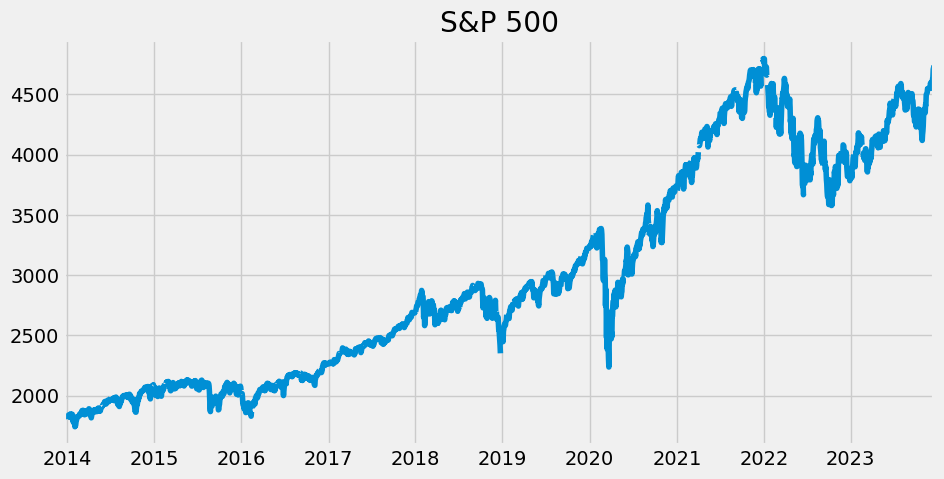

In [6]:
sp500.plot(figsize = (10, 5), title = 'S&P 500')

pull n join multiple data

In [7]:
unemp_results = fred.search('unemployment')
unemp_results


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-12-19,2023-12-19,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-12-19,2023-12-19,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-12-08 07:49:02-06:00,56,The unemployment rate represents the number of...
CCSA,CCSA,2023-12-19,2023-12-19,Continued Claims (Insured Unemployment),1967-01-07,2023-12-02,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-12-14 07:34:04-06:00,74,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-12-19,2023-12-19,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,67,"Starting with the July, 2021 report: An Update..."
CCNSA,CCNSA,2023-12-19,2023-12-19,Continued Claims (Insured Unemployment),1967-01-07,2023-12-02,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-12-14 07:34:12-06:00,36,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXPARK7URN,TXPARK7URN,2023-12-19,2023-12-19,"Unemployment Rate in Parker County, TX",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:10:50-06:00,6,These data come from the Current Population Su...
MIWAYN3URN,MIWAYN3URN,2023-12-19,2023-12-19,"Unemployment Rate in Wayne County, MI",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:11:03-06:00,6,These data come from the Current Population Su...
GANEWT7URN,GANEWT7URN,2023-12-19,2023-12-19,"Unemployment Rate in Newton County, GA",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:19:07-06:00,6,These data come from the Current Population Su...


<Axes: >

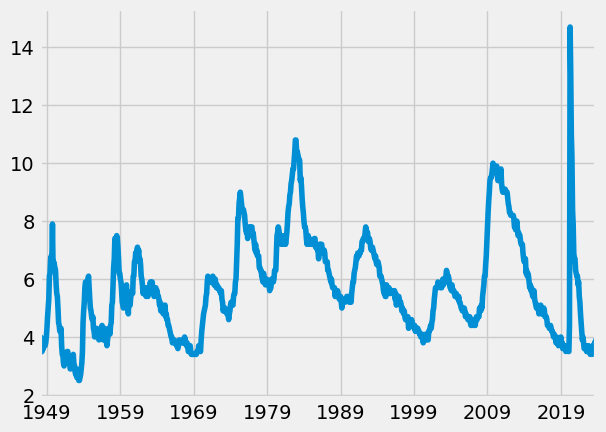

In [8]:
unrate = fred.get_series('UNRATE')
unrate.plot()

In [9]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-12-19,2023-12-19,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-12-19,2023-12-19,Unemployment Rate - Black or African American,1972-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:05-06:00,68,The series comes from the 'Current Population ...
CAUR,CAUR,2023-12-19,2023-12-19,Unemployment Rate in California,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:01-06:00,63,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-12-19,2023-12-19,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-12-19,2023-12-19,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,11,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN74TTUSM156S,LRUN74TTUSM156S,2023-12-19,2023-12-19,Unemployment Rate: Aged 15-74: All Persons for...,1981-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:38-06:00,3,OECD Descriptor ID: LRUN74TT OECD unit ID: PC ...
LNS14000029,LNS14000029,2023-12-19,2023-12-19,"Unemployment Rate - 20 Yrs. & over, White Women",1954-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:59-06:00,3,To obtain estimates of women worker employment...
LNS14000150,LNS14000150,2023-12-19,2023-12-19,Unemployment Rate - Married Men,1955-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:41-06:00,3,The series comes from the 'Current Population ...


In [44]:
all_results = []
for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name = myid)
  all_results.append(results)
uemp_results = pd.concat(all_results, axis=1).drop(['U2RATE','LNS14000006','M0892AUSM156SNBR','M0892BUSM156SNBR','LNS14000024','LNS14000002','LNS14000031','LNS14000009','LNS14000003','LNS14027662','LNS14027660', 'LNS14000001', 'LRUN64TTUSM156S','LNS14024887','LNS14000012', 'LNS14027659', 'LASMT261982000000003','LNS14032183', 'LNS14000060', 'LRUNTTTTUSM156S'	,'LNS14000091'	,'LNS14000093',	'LNS14023705'	,'LRUN74TTUSM156S'	,'LNS14000029'	,'LNS14000150'	,'USAURAMS'	,'LRUN25MAUSM156S','LASMT391746000000003','LNS14000036','LNS14024230','LNS14000028', 'LNS14000018','LNS14100000','LNS14200000','LNS14027689','LNS14000025', 'LNS14000048', 'LNS14000089','LRUN24TTUSM156S', 'LNS14000032', 'LNS14000026'  ], axis =1)

In [65]:
uemp_states = uemp_results.drop('UNRATE', axis=1)
uemp_states=uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [66]:
px.line(uemp_states)

Pull May 2020 unemp rates per state

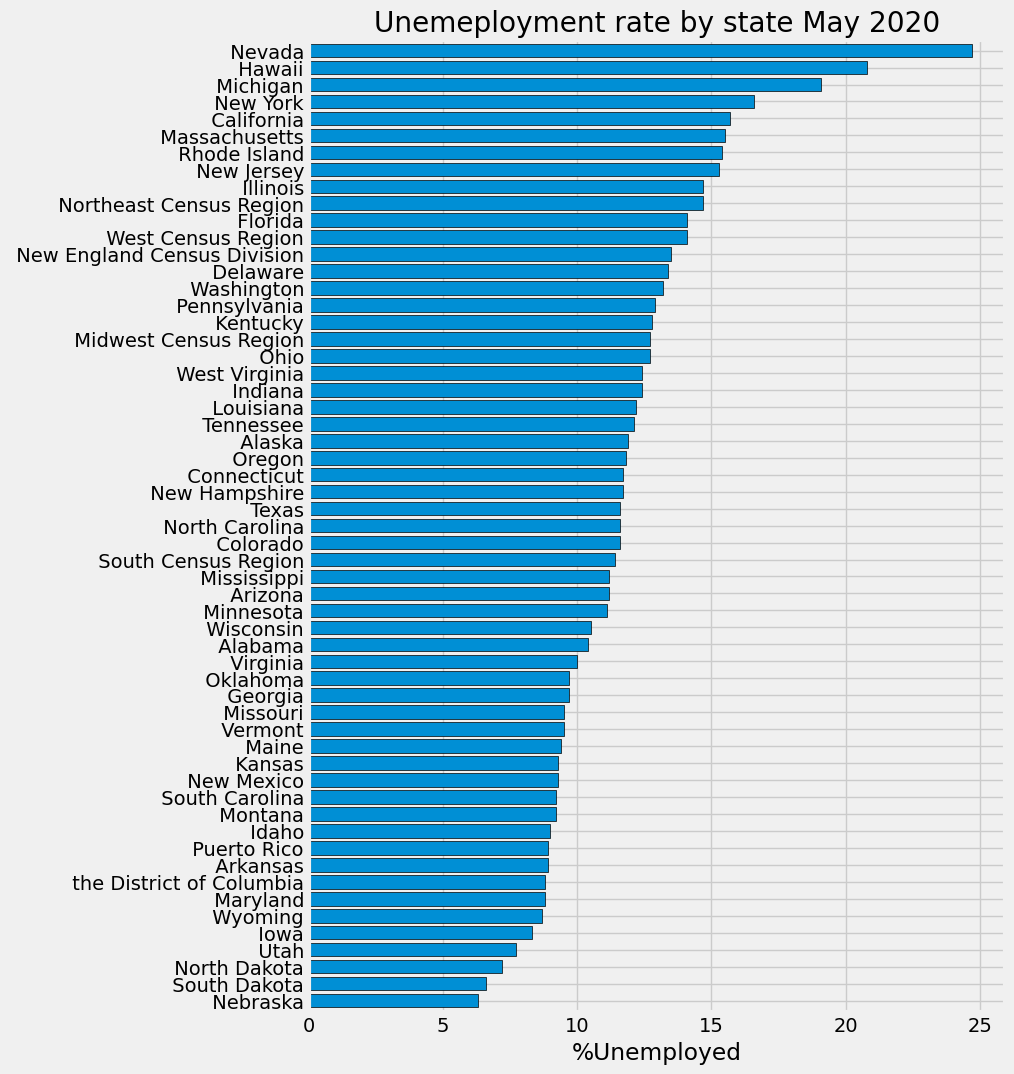

In [71]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T\
      .sort_values('2020-05-01') \
      .plot(kind = 'barh', figsize=(8,12), width = 0.8 , edgecolor ='black', title='Unemeployment rate by state May 2020')
ax.legend().remove()
ax.set_xlabel('%Unemployed')
plt.show()

Pull Participation Rate - Further scope

In [72]:
part_df = fred.search('participation rate state', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
partid_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-12-19,2023-12-19,Labor Force Participation Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:02-06:00,82,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-12-19,2023-12-19,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:10-06:00,66,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-12-19,2023-12-19,Labor Force Participation Rate - Women,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:10-06:00,64,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-12-19,2023-12-19,Labor Force Participation Rate - Men,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:12-06:00,55,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-12-19,2023-12-19,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:16-06:00,50,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRINTTMAUSM156S,LRINTTMAUSM156S,2023-12-19,2023-12-19,Inactivity Rate: Aged 15 and over: Males for U...,1975-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:43-06:00,1,OECD Descriptor ID: LRINTTMA OECD unit ID: PC ...
LRINTTFEUSM156S,LRINTTFEUSM156S,2023-12-19,2023-12-19,Inactivity Rate: Aged 15 and over: Females for...,1975-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:43-06:00,1,OECD Descriptor ID: LRINTTFE OECD unit ID: PC ...
LRIN74TTUSM156S,LRIN74TTUSM156S,2023-12-19,2023-12-19,Inactivity Rate: Aged 15-74: All Persons for U...,1981-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:38:08-06:00,0,OECD Descriptor ID: LRIN74TT OECD unit ID: PC ...
